In [25]:
import numpy as np
from random import randint as ri, random as rf
import matplotlib.pyplot as plt
from pylab import rcParams

from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Nadam

plt.style.use('seaborn-whitegrid')

In [2]:
np.random.seed(12)

In [21]:
rcParams['figure.figsize'] = 16, 9

In [4]:
def airplane(last_points):
    x, y = ri(1,2)*rf(), ri(-1,1)*rf()
    return last_points+np.array([x, y])

In [5]:
start = np.array([ri(-5,5)*rf(),ri(-5,5)*rf()])
motion = [start]
for i in range(50):
    motion.append(airplane(motion[-1]))
motion = np.array(motion)

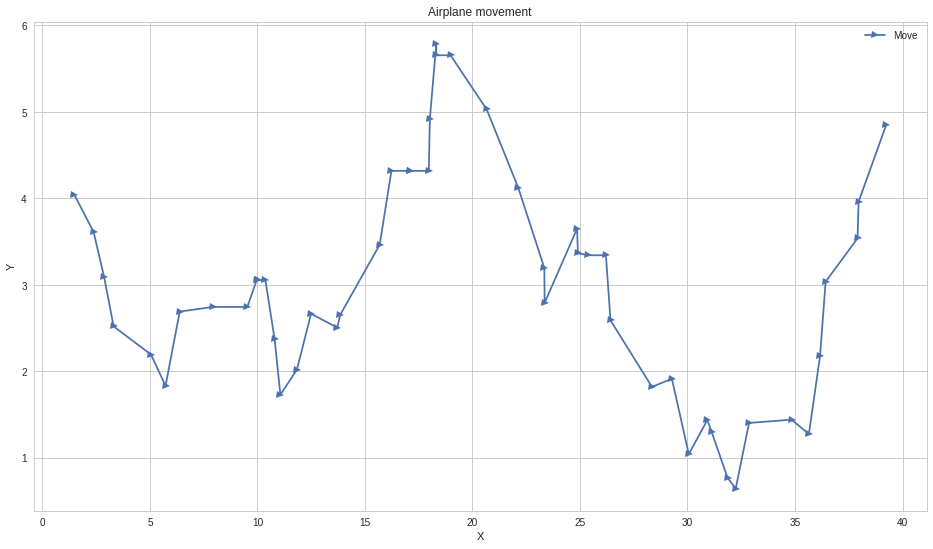

In [26]:
plt.plot(motion[:,0], motion[:,1], linestyle='-', marker='>', label='Move')
plt.title('Airplane movement')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [7]:
def airplane(last_points=np.array([ri(-100,100)*rf(), ri(-100,100)*rf()])):
        x, y = ri(1,2)*rf(), ri(-1,1)*rf()
        return np.hstack((last_points, [x, y])), [last_points+np.array([x, y])]

In [28]:
X, Y = airplane()
for i in range(10):
    x, y = airplane(Y[-1])
    Y = np.vstack((Y,y))
    X = np.vstack((X,x))

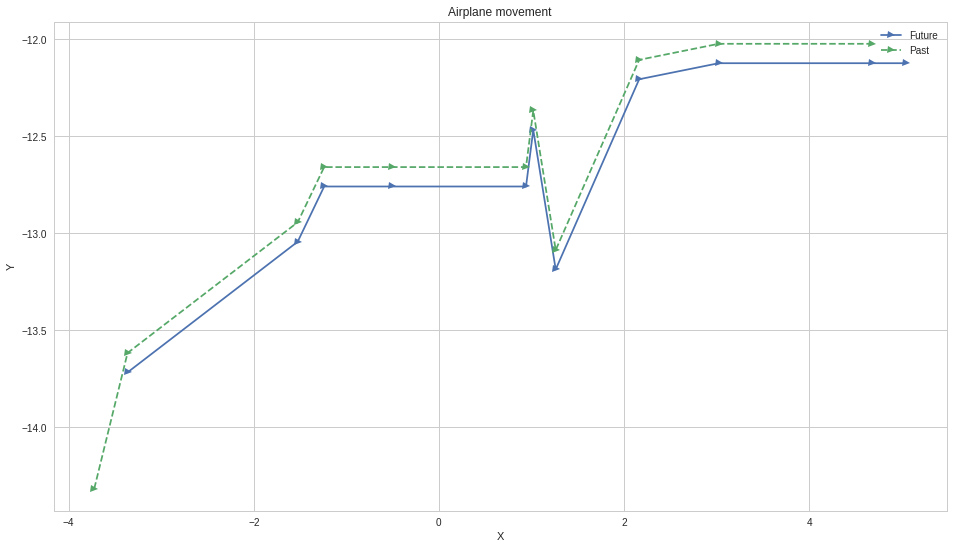

In [29]:
plt.plot(Y[:,0], Y[:,1], marker='>', label='Future')
plt.plot(X[:,0], X[:,1]+0.1, linestyle='--', marker='>', label='Past')
plt.title('Airplane movement')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()

In [30]:
X, Y = airplane()
for i in range(20):
    x, y = airplane(Y[-1])
    Y = np.vstack((Y,y))
    X = np.vstack((X,x))
    
for i in range(100):
    x, y = airplane()
    Y = np.vstack((Y,y))
    X = np.vstack((X,x))
    
    for i in range(20):
        x, y = airplane(Y[-1])
        Y = np.vstack((Y,y))
        X = np.vstack((X,x))

In [31]:
X_test, Y_test = airplane()
for i in range(20):
    x, y = airplane(Y_test[-1])
    Y_test = np.vstack((Y_test,y))
    X_test = np.vstack((X_test,x))
    
for i in range(20):
    x, y = airplane()
    Y_test = np.vstack((Y_test,y))
    X_test = np.vstack((X_test,x))
    
    for i in range(20):
        x, y = airplane(Y_test[-1])
        Y_test = np.vstack((Y_test,y))
        X_test = np.vstack((X_test,x))

In [13]:
X.shape, Y.shape, X_test.shape, Y_test.shape

((2121, 4), (2121, 2), (441, 4), (441, 2))

In [14]:
model = Sequential()

model.add(Dense(2, input_dim=X.shape[1]))

nadam = Nadam(lr=0.0002)
model.compile(loss='mae', optimizer=nadam)

In [36]:
Hist = model.fit(X, Y, batch_size=40, epochs=500, validation_data=(X_test,Y_test))

Train on 2121 samples, validate on 441 samples
Epoch 1/500
2121/2121 [==============================] - 0s - loss: 3.0394e-04 - val_loss: 5.7042e-04
Epoch 2/500
2121/2121 [==============================] - 0s - loss: 2.9727e-04 - val_loss: 6.4217e-04
Epoch 3/500
2121/2121 [==============================] - 0s - loss: 3.1067e-04 - val_loss: 5.7999e-04
Epoch 4/500
2121/2121 [==============================] - 0s - loss: 3.0924e-04 - val_loss: 5.9016e-04
Epoch 5/500
2121/2121 [==============================] - 0s - loss: 3.0654e-04 - val_loss: 2.3813e-04
Epoch 6/500
2121/2121 [==============================] - 1s - loss: 3.0692e-04 - val_loss: 1.9204e-04
Epoch 7/500
2121/2121 [==============================] - 0s - loss: 2.9765e-04 - val_loss: 4.5464e-04
Epoch 8/500
2121/2121 [==============================] - 0s - loss: 3.0270e-04 - val_loss: 3.1394e-04
Epoch 9/500
2121/2121 [==============================] - 0s - loss: 2.8093e-04 - val_loss: 3.8365e-04
Epoch 10/500
2121/2121 [===========

2121/2121 [==============================] - 0s - loss: 3.1472e-04 - val_loss: 3.3276e-04
Epoch 80/500
2121/2121 [==============================] - 0s - loss: 2.8192e-04 - val_loss: 2.8159e-04
Epoch 81/500
2121/2121 [==============================] - 0s - loss: 2.9880e-04 - val_loss: 5.3863e-04
Epoch 82/500
2121/2121 [==============================] - 0s - loss: 3.1179e-04 - val_loss: 8.8472e-04
Epoch 83/500
2121/2121 [==============================] - 0s - loss: 3.2159e-04 - val_loss: 4.4236e-04
Epoch 84/500
2121/2121 [==============================] - 0s - loss: 3.1782e-04 - val_loss: 1.8962e-04
Epoch 85/500
2121/2121 [==============================] - 0s - loss: 2.9570e-04 - val_loss: 2.9241e-04
Epoch 86/500
2121/2121 [==============================] - 0s - loss: 2.9915e-04 - val_loss: 4.3123e-04
Epoch 87/500
2121/2121 [==============================] - 0s - loss: 3.1104e-04 - val_loss: 3.4316e-04
Epoch 88/500
2121/2121 [==============================] - 0s - loss: 2.9871e-04 - val_

2121/2121 [==============================] - 0s - loss: 3.1711e-04 - val_loss: 7.5914e-04
Epoch 158/500
2121/2121 [==============================] - 0s - loss: 3.1876e-04 - val_loss: 5.2273e-04
Epoch 159/500
2121/2121 [==============================] - 0s - loss: 2.9940e-04 - val_loss: 6.8499e-04
Epoch 160/500
2121/2121 [==============================] - 0s - loss: 3.1229e-04 - val_loss: 4.5898e-04
Epoch 161/500
2121/2121 [==============================] - 0s - loss: 3.0440e-04 - val_loss: 7.0759e-04
Epoch 162/500
2121/2121 [==============================] - 0s - loss: 3.0476e-04 - val_loss: 5.3797e-04
Epoch 163/500
2121/2121 [==============================] - 0s - loss: 3.0786e-04 - val_loss: 6.6191e-04
Epoch 164/500
2121/2121 [==============================] - 0s - loss: 3.0988e-04 - val_loss: 6.4177e-04
Epoch 165/500
2121/2121 [==============================] - 0s - loss: 2.8857e-04 - val_loss: 5.7378e-04
Epoch 166/500
2121/2121 [==============================] - 0s - loss: 3.0407e-

2121/2121 [==============================] - 0s - loss: 2.9808e-04 - val_loss: 2.8401e-04
Epoch 236/500
2121/2121 [==============================] - 0s - loss: 2.8539e-04 - val_loss: 4.2084e-04
Epoch 237/500
2121/2121 [==============================] - 0s - loss: 2.9155e-04 - val_loss: 1.9302e-04
Epoch 238/500
2121/2121 [==============================] - 0s - loss: 3.0917e-04 - val_loss: 1.5456e-04
Epoch 239/500
2121/2121 [==============================] - 0s - loss: 3.0914e-04 - val_loss: 6.7994e-04
Epoch 240/500
2121/2121 [==============================] - 0s - loss: 3.1973e-04 - val_loss: 5.8332e-04
Epoch 241/500
2121/2121 [==============================] - 0s - loss: 3.1080e-04 - val_loss: 5.0012e-04
Epoch 242/500
2121/2121 [==============================] - 0s - loss: 3.0244e-04 - val_loss: 3.9562e-04
Epoch 243/500
2121/2121 [==============================] - 0s - loss: 3.0037e-04 - val_loss: 1.8528e-04
Epoch 244/500
2121/2121 [==============================] - 0s - loss: 3.0702e-

2121/2121 [==============================] - 0s - loss: 2.9003e-04 - val_loss: 9.2396e-04
Epoch 314/500
2121/2121 [==============================] - 1s - loss: 3.2545e-04 - val_loss: 3.5463e-04
Epoch 315/500
2121/2121 [==============================] - 1s - loss: 3.0642e-04 - val_loss: 3.4548e-04
Epoch 316/500
2121/2121 [==============================] - 0s - loss: 2.9063e-04 - val_loss: 3.9109e-04
Epoch 317/500
2121/2121 [==============================] - 1s - loss: 3.1182e-04 - val_loss: 4.3014e-04
Epoch 318/500
2121/2121 [==============================] - 1s - loss: 3.0732e-04 - val_loss: 2.4144e-04
Epoch 319/500
2121/2121 [==============================] - 0s - loss: 3.0123e-04 - val_loss: 2.8930e-04
Epoch 320/500
2121/2121 [==============================] - 1s - loss: 2.9329e-04 - val_loss: 4.9208e-04
Epoch 321/500
2121/2121 [==============================] - 1s - loss: 3.2494e-04 - val_loss: 1.9279e-04
Epoch 322/500
2121/2121 [==============================] - 0s - loss: 3.1236e-

2121/2121 [==============================] - 0s - loss: 2.9235e-04 - val_loss: 6.8310e-04
Epoch 392/500
2121/2121 [==============================] - 0s - loss: 3.1182e-04 - val_loss: 8.1170e-04
Epoch 393/500
2121/2121 [==============================] - 0s - loss: 3.1664e-04 - val_loss: 9.5301e-04
Epoch 394/500
2121/2121 [==============================] - 0s - loss: 3.0333e-04 - val_loss: 5.0386e-04
Epoch 395/500
2121/2121 [==============================] - 0s - loss: 2.9861e-04 - val_loss: 3.5044e-04
Epoch 396/500
2121/2121 [==============================] - 0s - loss: 2.9151e-04 - val_loss: 1.2537e-04
Epoch 397/500
2121/2121 [==============================] - 0s - loss: 2.8156e-04 - val_loss: 7.6231e-04
Epoch 398/500
2121/2121 [==============================] - 0s - loss: 3.2110e-04 - val_loss: 4.1800e-04
Epoch 399/500
2121/2121 [==============================] - 0s - loss: 3.2657e-04 - val_loss: 5.2679e-04
Epoch 400/500
2121/2121 [==============================] - 0s - loss: 2.9660e-

2121/2121 [==============================] - 0s - loss: 3.2023e-04 - val_loss: 2.0107e-04
Epoch 470/500
2121/2121 [==============================] - 0s - loss: 3.0620e-04 - val_loss: 3.5305e-04
Epoch 471/500
2121/2121 [==============================] - 0s - loss: 2.9641e-04 - val_loss: 5.0468e-04
Epoch 472/500
2121/2121 [==============================] - 0s - loss: 3.0242e-04 - val_loss: 4.4624e-04
Epoch 473/500
2121/2121 [==============================] - 0s - loss: 3.0288e-04 - val_loss: 4.4666e-04
Epoch 474/500
2121/2121 [==============================] - 0s - loss: 3.0801e-04 - val_loss: 2.6967e-04
Epoch 475/500
2121/2121 [==============================] - 0s - loss: 2.9892e-04 - val_loss: 5.9282e-04
Epoch 476/500
2121/2121 [==============================] - 0s - loss: 2.9754e-04 - val_loss: 1.4758e-04
Epoch 477/500
2121/2121 [==============================] - 0s - loss: 3.0764e-04 - val_loss: 8.0146e-04
Epoch 478/500
2121/2121 [==============================] - 0s - loss: 3.1148e-

In [43]:
model.save('linear.h5')

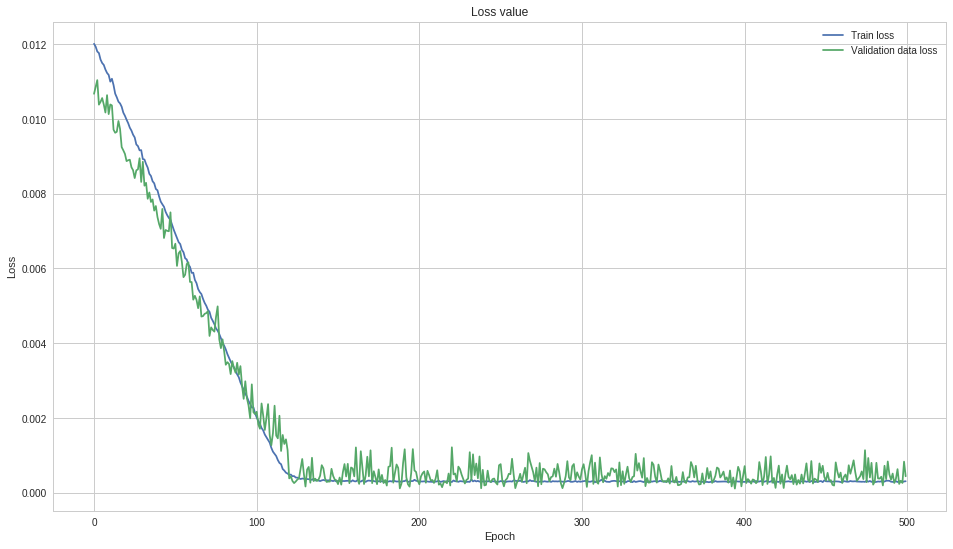

In [33]:
plt.plot(list(range(500)), Hist.history['loss'], label='Train loss')
plt.plot(list(range(500)), Hist.history['val_loss'], label='Validation data loss')
plt.title('Loss value')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

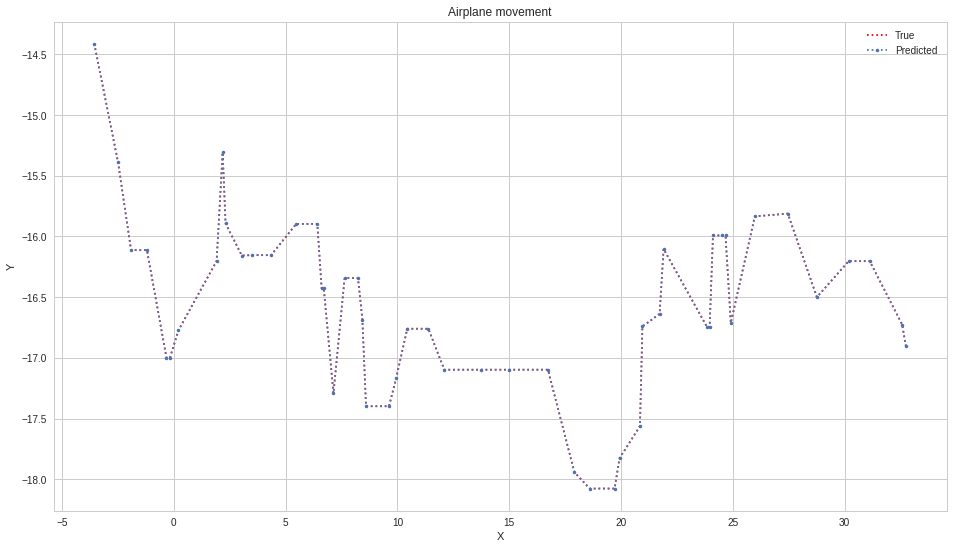

[ -3.72386343 -14.41479749]


In [40]:
X_super_test, Y_super_test = airplane()
for i in range(50):
    x, y = airplane(Y_super_test[-1])
    Y_super_test = np.vstack((Y_super_test,y))
    X_super_test = np.vstack((X_super_test,x))
    
now = model.predict(X_super_test[:1])
predicted = np.array(now)
for i in range(1, X_super_test.shape[0]):
    now = model.predict(np.hstack((now,X_super_test[i:i+1,2:])))
    predicted = np.vstack((predicted,now))
    
plt.plot(Y_super_test[:,0], Y_super_test[:,1], linestyle=':', label='True', color='r')
plt.plot(predicted[:,0], predicted[:,1], linestyle=':', marker='.', label='Predicted')
plt.title('Airplane movement')
plt.xlabel('X')
plt.ylabel('Y')
plt.legend()
plt.show()
print(X_super_test[0,:2])

In [41]:
W, B = model.get_weights()

In [42]:
print("Weights and Biases: ")
print(W,B)
print("Input: ")
print(X_super_test[10:11])
print("Output:")
print(np.dot(X_super_test[10:11], W)+B)
print("True:")
print(Y_super_test[10:11])

Weights and Biases: 
[[  9.99999821e-01   2.36869766e-07]
 [  2.88696214e-08   9.99999881e-01]
 [  9.99999642e-01   6.90467914e-08]
 [  9.73221859e-09   9.99999523e-01]] [  5.65722473e-08  -7.26330143e-08]
Input: 
[[  2.31030437 -15.89407945   0.72647049  -0.26389059]]
Output:
[[  3.03677378 -16.15796749]]
True:
[[  3.03677486 -16.15797004]]


In [37]:
nadam = Nadam(lr=0.000001)
model.compile(loss='mae', optimizer=nadam)

In [38]:
Hist = model.fit(X, Y, batch_size=40, epochs=200, validation_data=(X_test,Y_test))

Train on 2121 samples, validate on 441 samples
Epoch 1/200
2121/2121 [==============================] - 1s - loss: 1.6240e-04 - val_loss: 1.0635e-04
Epoch 2/200
2121/2121 [==============================] - 0s - loss: 8.5662e-05 - val_loss: 9.0378e-05
Epoch 3/200
2121/2121 [==============================] - 0s - loss: 6.6487e-05 - val_loss: 6.8136e-05
Epoch 4/200
2121/2121 [==============================] - 0s - loss: 4.8911e-05 - val_loss: 6.0688e-05
Epoch 5/200
2121/2121 [==============================] - 0s - loss: 3.8382e-05 - val_loss: 4.2908e-05
Epoch 6/200
2121/2121 [==============================] - 0s - loss: 2.9010e-05 - val_loss: 2.8320e-05
Epoch 7/200
2121/2121 [==============================] - 0s - loss: 1.9693e-05 - val_loss: 2.5083e-05
Epoch 8/200
2121/2121 [==============================] - 0s - loss: 1.1235e-05 - val_loss: 9.8416e-06
Epoch 9/200
2121/2121 [==============================] - 0s - loss: 9.2859e-06 - val_loss: 6.7258e-06
Epoch 10/200
2121/2121 [===========

2121/2121 [==============================] - 0s - loss: 3.6416e-06 - val_loss: 9.4887e-06
Epoch 80/200
2121/2121 [==============================] - 0s - loss: 3.5031e-06 - val_loss: 3.9755e-06
Epoch 81/200
2121/2121 [==============================] - 0s - loss: 3.4863e-06 - val_loss: 6.1950e-06
Epoch 82/200
2121/2121 [==============================] - 0s - loss: 3.4896e-06 - val_loss: 3.4717e-06
Epoch 83/200
2121/2121 [==============================] - 0s - loss: 3.2505e-06 - val_loss: 4.1658e-06
Epoch 84/200
2121/2121 [==============================] - 0s - loss: 3.6669e-06 - val_loss: 4.8397e-06
Epoch 85/200
2121/2121 [==============================] - 0s - loss: 3.6105e-06 - val_loss: 5.7762e-06
Epoch 86/200
2121/2121 [==============================] - 1s - loss: 3.5651e-06 - val_loss: 1.4707e-06
Epoch 87/200
2121/2121 [==============================] - 0s - loss: 3.4629e-06 - val_loss: 4.8965e-06
Epoch 88/200
2121/2121 [==============================] - 1s - loss: 3.4875e-06 - val_

2121/2121 [==============================] - 0s - loss: 2.7178e-06 - val_loss: 3.8774e-06
Epoch 159/200
2121/2121 [==============================] - 0s - loss: 2.5184e-06 - val_loss: 2.4090e-06
Epoch 160/200
2121/2121 [==============================] - 0s - loss: 2.5819e-06 - val_loss: 3.0385e-06
Epoch 161/200
2121/2121 [==============================] - 1s - loss: 2.4427e-06 - val_loss: 1.8677e-06
Epoch 162/200
2121/2121 [==============================] - 0s - loss: 2.4172e-06 - val_loss: 2.3802e-06
Epoch 163/200
2121/2121 [==============================] - 0s - loss: 2.6366e-06 - val_loss: 4.4239e-06
Epoch 164/200
2121/2121 [==============================] - 0s - loss: 2.5499e-06 - val_loss: 2.1287e-06
Epoch 165/200
2121/2121 [==============================] - 0s - loss: 2.3646e-06 - val_loss: 2.4598e-06
Epoch 166/200
2121/2121 [==============================] - 1s - loss: 2.4941e-06 - val_loss: 2.2964e-06
Epoch 167/200
2121/2121 [==============================] - 1s - loss: 2.5895e-

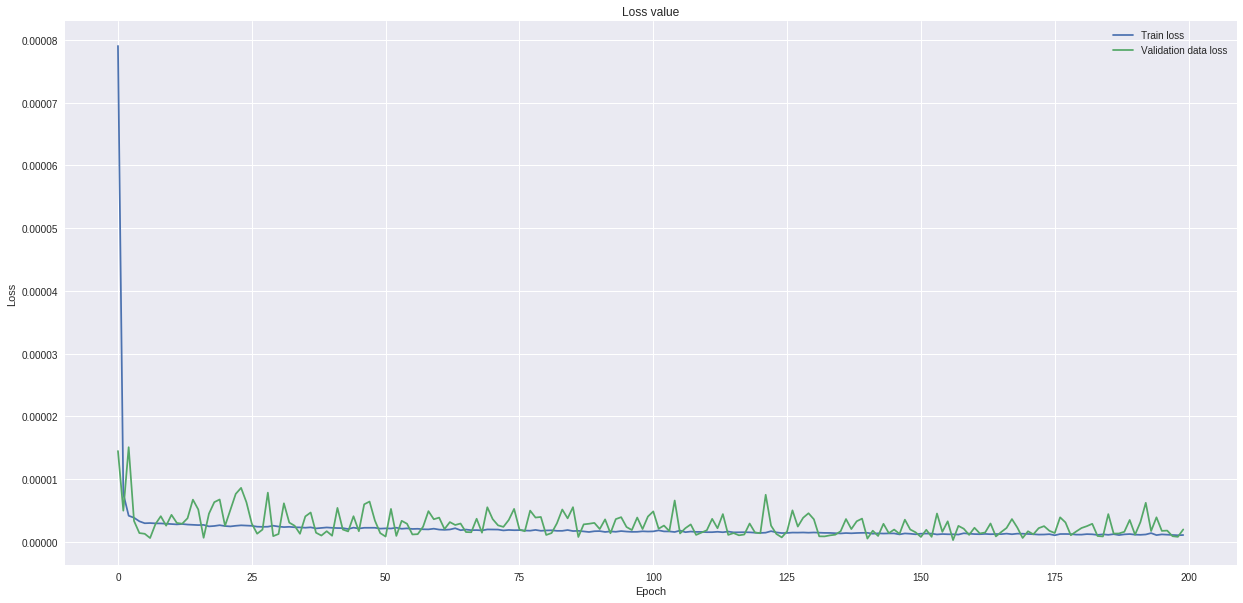

In [626]:
plt.plot(list(range(200)), Hist.history['loss'], label='Train loss')
plt.plot(list(range(200)), Hist.history['val_loss'], label='Validation data loss')
plt.title('Loss value')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()